## Project 2
(309605008 黃筱晴)

assign November 2, 2020 due November 7, 2020


Consider the centered DFT for Bird 2.tif, re-synthesize the images using the DFT coefficients 

(1) inside (r < 30), and (2) outside (r > 30) the circular region with radius=30 pixels (based on the original image size), plot the resulted images.


Source codes (30%)

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

# loaded the image in grayscale
image = cv2.imread('Bird 2.tif',0)
image_float32 = np.float32(image) # convert from uint8 into float32

dft = cv2.dft(image_float32, flags = cv2.DFT_COMPLEX_OUTPUT) # Computed the 2-d discrete Fourier Transform
dft_shift = np.fft.fftshift(dft) # Shift the zero-frequency component to the center of the spectrum.
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])) # compute magnitude spectrum



#Low Pass Filter
dft = cv2.dft(image_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = image.shape
crow, ccol = rows//2 , cols//2     # center

# create a mask first, center square is 1, remaining all zeros
low_mask = np.zeros((rows, cols, 2), np.uint8)
low_mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*low_mask
f_ishift = np.fft.ifftshift(fshift)
img_low = cv2.idft(f_ishift)
img_low = cv2.magnitude(img_low[:,:,0],img_low[:,:,1])




#Hight Pass Filter
dft = cv2.dft(image_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = image.shape
crow, ccol = rows//2 , cols//2     # center

# create a mask first, center square is 0, remaining all ones
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 0

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_high = cv2.idft(f_ishift)
img_high = cv2.magnitude(img_high[:,:,0],img_high[:,:,1])

Plot of DFT magnitude in Log scale (20%)

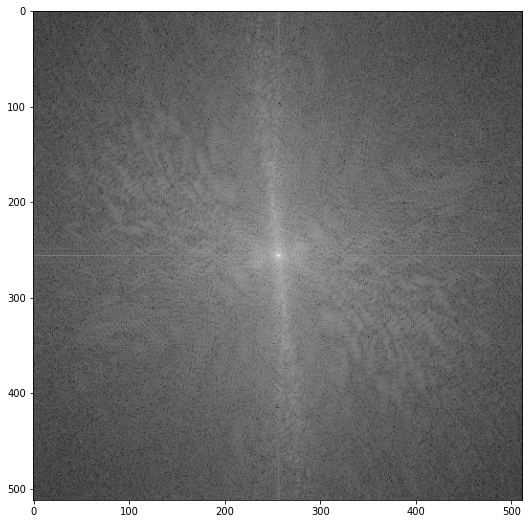

In [2]:
plt.figure(figsize=(14,9))
plt.imshow(magnitude_spectrum, cmap = 'gray')

Image constructed by DFT coefficients inside the circular region with radius = 30
pixels (15%)

Text(0.5, 1.0, 'Low Pass Filter')

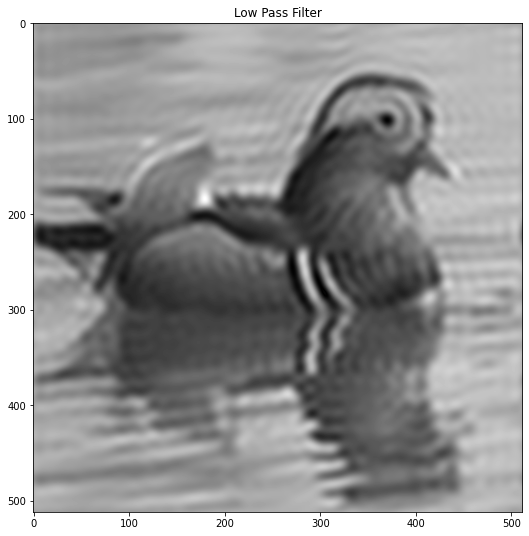

In [3]:
plt.figure(figsize=(14,9))
plt.imshow(img_low, cmap = 'gray')
plt.title('Low Pass Filter')

Image constructed by DFT coefficients outside the circular region with radius = 30
pixels (15%) 

Text(0.5, 1.0, 'High Pass Filter')

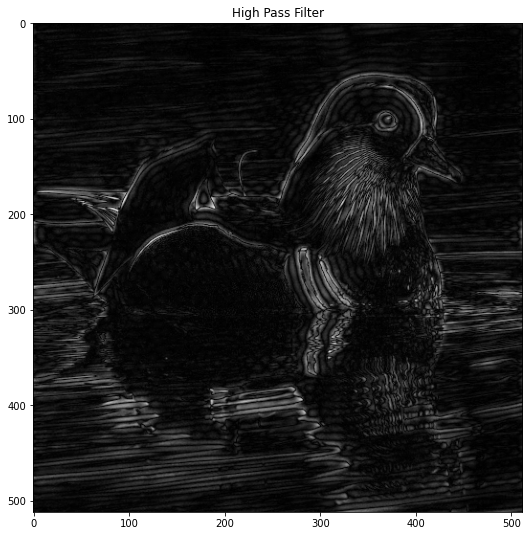

In [4]:
plt.figure(figsize=(14,9))
plt.imshow(img_high, cmap = 'gray')
plt.title('High Pass Filter')

Table of top 25 DFT frequencies (u,v) in the left half frequency region (0<=u<=M-1,
0<=v<=N/2-1) (20%)

In [5]:
rows, cols = magnitude_spectrum.shape

array=[]
for u in range(rows//2):
  for v in range(cols):    
    array.append([magnitude_spectrum[u][v],u,v])
    

print('top 25 ([DFT_frequencies,u,v]):')
array.sort()
array.reverse()
for i in range(25):
  print(array[i])

top 25 ([DFT_frequencies,u,v]):
[306.12363, 255, 256]
[289.26358, 255, 255]
[287.65848, 255, 257]
[282.8861, 255, 258]
[281.48758, 253, 255]
[278.69717, 253, 258]
[275.6128, 254, 257]
[272.10452, 253, 257]
[268.75012, 253, 254]
[267.57715, 254, 260]
[267.1798, 254, 254]
[267.1516, 252, 256]
[266.6424, 254, 259]
[265.8584, 252, 253]
[265.40668, 248, 255]
[264.16266, 254, 255]
[264.0195, 254, 252]
[263.40283, 252, 258]
[263.37115, 250, 257]
[262.75793, 254, 253]
[262.59485, 250, 256]
[261.8376, 255, 252]
[261.51242, 255, 254]
[260.74612, 252, 255]
[260.26202, 251, 258]
